In [19]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, filtfilt, freqz
import scipy.fftpack as fft

In [20]:
def generate_sin_wave(fs, fg, N):
    Np = int(fg/fs)
    k = np.arange(N)
    s = np.sin(2 * np.pi * fs * k / fg)
    plt.stem(k, s)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title('Discrete-domain Sin Wave')
    plt.show()
    return s, Np

In [21]:
def compute_dft(s):
    X_amp =np.abs(np.fft.fftshift(np.fft.fft(s)))
    return X_amp

In [22]:
def plot_dft(s):
    N = len(s)
    S = np.abs(np.fft.fftshift(np.fft.fft(s)))
    f = np.linspace(-N//2, N//2-1, N) * 10
    plt.stem(f, S)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title('Shifted DFT')
    plt.show()
    return S


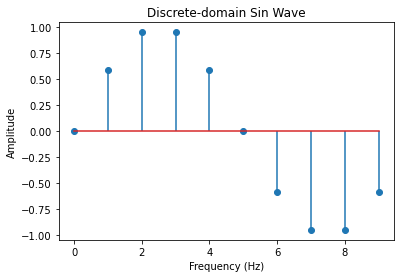

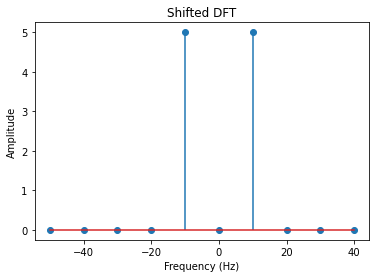

In [23]:
# Generate the discrete-domain sin wave
fs = 10
fg = 100
N = 10
sin, Np = generate_sin_wave(fs, fg, N)
dft = plot_dft(sin)

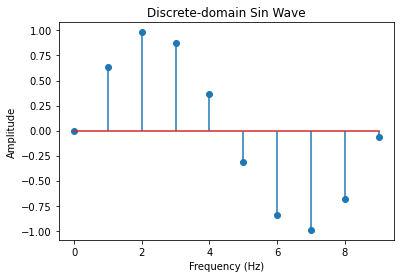

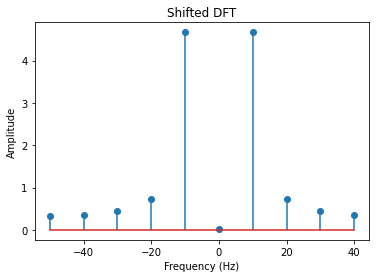

In [24]:
fs = 11  # frequency of sin signal
s, Np = generate_sin_wave(fs, fg, N)
dft = plot_dft(s)

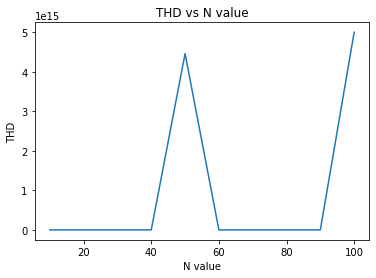

The optimal N value is: 30


In [25]:
def generate_sin_wave_(fs, fg, N_range):
    THD = []
    for N in N_range:
        Np = int(fg/fs)
        k = np.arange(N)
        s = np.sin(2 * np.pi * fs * k / fg)
        X_amp = compute_dft(s)
        THD.append(np.sqrt(np.sum(X_amp[1:]**2))/np.max(X_amp[0]))
    min_idx = np.argmin(THD)
    optimal_N = N_range[min_idx]
    plt.plot(N_range, THD)
    plt.xlabel('N value')
    plt.ylabel('THD')
    plt.title('THD vs N value')
    plt.show()
    return optimal_N

fs = 18

# Generate the discrete-domain sin wave with a range of N values
N_range = np.arange(10, 101, 10)
optimal_N = generate_sin_wave_(fs, fg, N_range)
print("The optimal N value is:", optimal_N)

In [26]:
# Load the file 100m.mat and display the signal
data = sio.loadmat('100m.mat')
val = data['val']
val = val[0]

In [27]:
def plot_dft(signal, fs):
    dft = np.fft.fft(signal)
    dft = dft[1: len(dft) // 2 + 1]
    magnitude = np.abs(dft)
    magnitude = np.fft.fftshift(magnitude)
    f = np.fft.fftfreq(signal.size, d=1/fs)
    f = f[:len(f) // 2]
    f = np.fft.fftshift(f)
    return magnitude, f


In [28]:
def remove_spurious_frequency(signal, fs=1000):
    # Design the band-stop filter
    nyquist = 0.5 * fs
    low = 59 / nyquist
    high = 61 / nyquist
    b, a = butter(2, [low, high], 'bandstop')

    # Apply the filter to the signal
    filtered_signal = filtfilt(b, a, signal)

    return filtered_signal

In [29]:
def damping_to_frequency(damping_factor, sample_rate):
    # Calculate the natural frequency
    natural_frequency = sample_rate / (2 * np.pi) * np.arctan(damping_factor)

    # Calculate the cutoff frequency
    cutoff_frequency = natural_frequency / np.sqrt(1 + damping_factor**2)

    return cutoff_frequency

In [30]:
def lowpass_filter(signal, fs = 1000):
    
    cutoff_frequency= damping_to_frequency(0.707, fs)
    # Design the low-pass filter
    nyquist = 0.5 * fs
    cutoff = cutoff_frequency / nyquist
    b, a = butter(2, cutoff, 'low', analog=False)

    # Apply the filter in the frequency domain
    signal_fft = fft.fft(signal)
    frequencies = fft.fftfreq(signal.size, 1/fs)
    filter_response = freqz(b, a, frequencies)
    filtered_signal_fft = signal_fft * filter_response[1]

    # Reconstruct the filtered signal
    filtered_signal = fft.ifft(filtered_signal_fft)
    filtered_signal = np.real(filtered_signal)

    return filtered_signal

In [31]:
# def low_pass_filter(data, fs = 1000, order=5):
#     cutoff = damping_to_frequency(0.707, fs)
#     nyquist = 0.5 * fs
#     normal_cutoff = cutoff / nyquist
#     b, a = butter(order, normal_cutoff, btype='low')
#     filtered_data = lfilter(b, a, data)
#     return filtered_data

In [32]:
N = 500
val_period = val[:N]

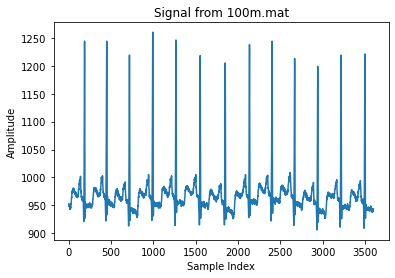

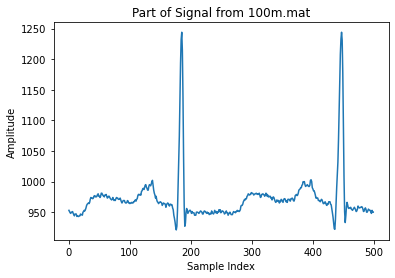

In [33]:
plt.plot(val)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Signal from 100m.mat')
plt.show()

# Plot the time domain signal
plt.plot(val_period)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Part of Signal from 100m.mat')
plt.show()


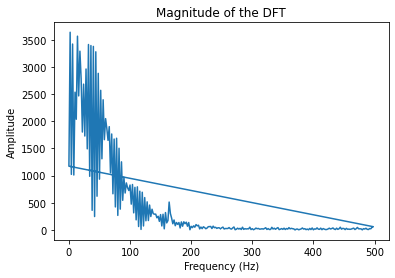

In [34]:
# Plot the magnitude of the DFT, excluding the mean value
magnitude, f = plot_dft(val_period, fs=1000)
plt.plot(f, magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Magnitude of the DFT')
plt.show()


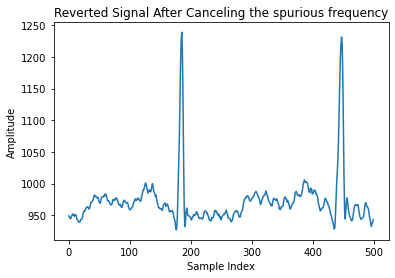

In [35]:
# Apply the low-pass filter
filtered_val = remove_spurious_frequency(val_period)
plt.plot(filtered_val)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Reverted Signal After Canceling the spurious frequency')
plt.show()


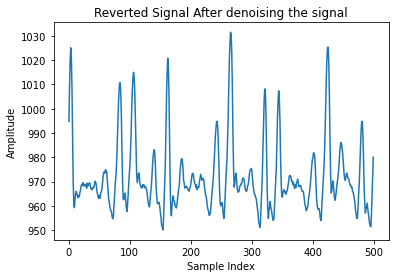

In [36]:
denoise = lowpass_filter(filtered_val)
plt.plot(denoise)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Reverted Signal After denoising the signal')
plt.show()